In [320]:
from ase.lattice import bulk
from ase import Atoms
from ase.lattice.hexagonal import *
from ase.visualize import view
from ase.calculators.eam import EAM
from gpaw import GPAW,PW
import matplotlib.pyplot as plt
import math
import warnings
from IPython.display import Image
warnings.filterwarnings('ignore')

In [285]:
#MOLECULE VIEWER CODE
from IPython.display import HTML
def atoms_to_html(atoms):
    'Return the html representation the atoms object as string'

    from tempfile import NamedTemporaryFile

    with NamedTemporaryFile('r+', suffix='.html') as ntf:
        atoms.write(ntf.name, format='html')
        ntf.seek(0)
        html = ntf.read()
    return html

# Kristallvõred

ase.lattice.bulk võimaldab lihtsalt koostada ühikrakke. Argumentiks peab andma elemendi sümboli ning defineerima võretüübi. 
Aktsepteeritud võretüübid on: sc, fcc, bcc, hcp, diamond, zincblende, rocksalt, cesiumchloride, fluorite ja wurtzite.
Levinud kristallide jaoks on võreparameetrid moodulile teada, kui neid ei ole, siis tuleb nad defineerida.

In [287]:
D = bulk('C', 'diamond', cubic=True)    #Süsinik, teemanti struktuuriga, koostame kuubikujulise raku
D=D.repeat((1,1,1))                     #Süsteemi saab suurendada ühikrakku korrates
HTML(atoms_to_html(D))                  #Visualiseerime saadud süsteemi

In [288]:
Cu = bulk('Cu', 'fcc', a=3.6)    #Vask, kuubilises tihepakendis
Cu=Cu.repeat((3,3,3))            #Süsteemi saab suurendada ühikrakku korrates
HTML(atoms_to_html(Cu))          #Visualiseerime saadud süsteemi

ase.lattice mooduliga saab koostada ka neid võresid, mida ase.lattice.bulk moodulis defineeritud pole.
Võimalikud on:

lattice.cubic

    SimpleCubic
    FaceCenteredCubic
    BodyCenteredCubic
    Diamond (*)

lattice.tetragonal

    SimpleTetragonal
    CenteredTetragonal

lattice.orthorhombic

    SimpleOrthorhombic
    BaseCenteredOrthorhombic
    FaceCenteredOrthorhombic
    BodyCenteredOrthorhombic

lattice.monoclinic

    SimpleMonoclinic
    BaseCenteredMonoclinic

lattice.triclinic

    Triclinic

lattice.hexagonal

    Hexagonal
    HexagonalClosedPacked (*)
    Graphite (*)

Koostame ase.lattice.hexagonal mooduli abil grafiidi.
Vaja on defineerida, nagu enne, elemendi sümbol ning võrekonstandid.
Erinevalt bulk moodulist tuleb saab teistes ase.lattice alammoodulites otse defineerida süsteemi suuruse.

In [291]:
Gr = Graphite(symbol='C',latticeconstant={'a':2.461,'c':6.708},size=(1,1,1))
HTML(atoms_to_html(Gr.repeat((2,2,2))))

ase.lattice moodulis on ka defineeritud mõningaid binaarseid ühikrakke:

    B1 = NaCl = Rocksalt
    B2 = CsCl
    B3 = ZnS = Zincblende
    L1_2 = AuCu3
    L1_0 = AuCu
  
ase.lattice.bulk moodulis on defineeritud zincblende, rocksalt, cesiumchloride, fluorite ja wurtzite.

In [293]:
ZnS = bulk('ZnS', 'zincblende', a = 5.0, cubic=True)
HTML(atoms_to_html(ZnS.repeat((2,2,2))))

In [296]:
NaCl = bulk('NaCl', 'rocksalt', a = 5.0, cubic=True)
HTML(atoms_to_html(NaCl.repeat((2,2,2))))

In [297]:
CsCl = bulk('CsCl', 'cesiumchloride', a = 5.0, cubic=True)
HTML(atoms_to_html(CsCl.repeat((2,2,2))))

In [300]:
FeS = bulk('FeS', 'wurtzite', a = 5.0)
HTML(atoms_to_html(FeS.repeat((2,3,2))))

Süsteemid, mida ase.lattice moodulis kirjeldatud ei ole, tuleb defineerida käsitsi. Ehk tuleb kasutada ase.Atoms moodulit.

ase.Atoms moodulis defineeritakse kõigi aatomite elemendid, nende aatomite asukohad, ühikraku suurus ning perioodilisus. Põhimõtteliselt pole vahet, kas kasutada ase.Atoms või ase.lattice moodulit, viimane on lihtsalt mugavam.

Nt järgmine koodijupp defineerib 1-dimensionaalselt perioodilise kuldketi.

In [301]:
d = 2.9                                          #Au-Au sideme pikkus
L = 10.0                                         #Ühikraku x ja y mõõde
wire = Atoms('Au',                               #Element on kuld
             positions=[[0, L / 2, L / 2]],      #Kulla aatomi x,y,z koordinaadid
             cell=[d, L, L],                     #Ühikraku parameetrid
             pbc=[1, 0, 0])                      #Perioodilisus ainult x-dimensioonis
wire.translate((0,-L/2,-L/2))                    #Viime aatomi koordinaatteljestiku keskele
HTML(atoms_to_html(wire.repeat((6,1,1))))        #Visualiseerime

Raskem näide: raudboriid, Fe$_{2}$B. Üritame reprodutseerida joonisel olevat ühikrakku.

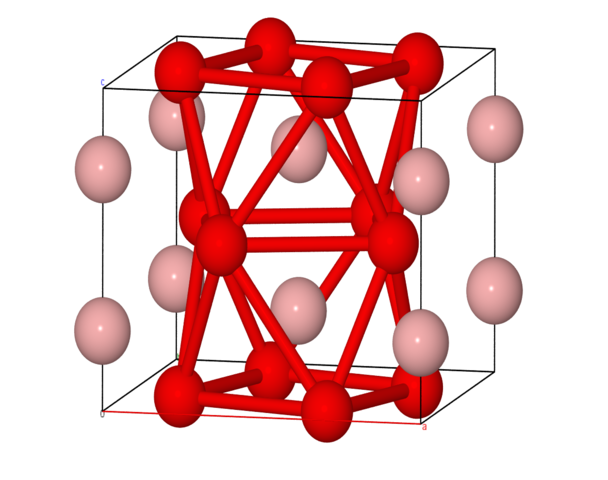

In [302]:
Image("Fe2B.png")

Joonisel on mitmed aatomid jagamisel mitme ühikraku vahel. Näiteks risttahuka tahul asetsevad aatomid on jagatud kahe ühikraku vahel. Servades paiknevad aatomid on jagatud nelja ühikraku vahel. Ühikraku tippudes paiknevad aatomid oleksid jagatud kaheksa ühikraku vahel.  

Seda peab ühikraku koostamisel silmas pidama, sest koostatud ühikrakku korrates ükskõik mis suunas ei taha me luua aatomeid topelt. Need aatomid, mis on ühikraku sees, võib defineerida muretult (antud juhul keskmised neli Fe aatomit ning kaks B aatomit).

In [303]:
a=5.2  #võreparameeter a
b=3.8  #võreparameeter b
c=4.8  #võreparameeter c
x=2.5  #Fe antiprismiaatilise ruudu küljepikkus

#Lihtsuse mõttes defineerime raua tasandid alguses eraldi.
#Lisaks on lihtsam defineerida tasandeid, mis on paralleelsed ühikraku vektoritega. 

Fe_up = Atoms('FeFe',                           #Ülemine Fe "ruut" joonisel
             positions=[[(a-x)/2.,(b-x)/2.,c],  #Defineerima kaks aatomit neljast, sest neid jagatakse
             [(a-x)/2.,(b-x)/2.+x,c]],
             cell=[a, b, c],                    #Võreparameetrid on mugav sisestada muutujatena  
             pbc=[1, 1, 1])                     #Ühikrakk on igas suunas perioodiline

Fe_mid = Atoms('FeFeFeFe',                      #Keskmine Fe ruut
             positions=[[(a-x)/2.,(b-x)/2.,1/2.*c], 
             [(a-x)/2.,(b-x)/2.+x,1/2.*c],      #Kõik aatomid on ainult selle ühikraku omad
             [(a-x)/2.+x,(b-x)/2.,1/2.*c],      #seega sisestame kõigi koordinaadid
             [(a-x)/2.+x,(b-x)/2.+x,1/2.*c]],
             cell=[a, b, c],                     
             pbc=[1, 1, 1])

Fe_down = Atoms('FeFe',                         #Alumine Fe ruut
             positions=[[(a-x)/2.+x,(b-x)/2.+x,0],
             [(a-x)/2.+x,(b-x)/2.,0]],          #Tuleb taas defineerida ainult 2/4 Fe aatomit
             cell=[a, b, c],                    #ning ülemine ja alumine osa peavad omavahel sobima
             pbc=[1, 1, 1])

#Ülemine ja alumine ruut on 45/2=22.5 kraadi "viltu" z-telje suhtes.
Fe_up.rotate(22.5,"z", center="COM", rotate_cell=False)
Fe_down.rotate(22.5,"z", center="COM", rotate_cell=False)

#Keskmine ruut on 90-(45/2)=67.5 kraadi "viltu" z-telje suhtes.
Fe_mid.rotate(67.5,"z", center="COM", rotate_cell=False)

Fe=Fe_up+Fe_down+Fe_mid                         #Liidame rauatasandid kokku

HTML(atoms_to_html(Fe.repeat((1,1,2)))) 

In [304]:
#Booride lisamisel tuleb kindlasti defineerida mõlemad kesksed aatomid.
#Lisaks tuleb valida kaheksast servapealsest välja kaks boori lisaks.
B = Atoms('BBBB',                               #Defineerime booride asukohad
             positions=[[1/2.*a,1/2.*b,1/4.*c],
             [1/2.*a,1/2.*b,3/4.*c],
             [0,b,3/4.*c],
             [a,0,1/4.*c]],
             cell=[a, b, c],                     
             pbc=[1, 1, 1])

Fe2B=Fe+B                                       #Lisame boorid rauale
HTML(atoms_to_html(Fe2B.repeat((1,1,2))))       #Valmis!

# Võreparameetri optimeerimine

Eesmärk: leida räni teemantstruktuuri võreparameeter.

#1 Leiame olemasoleva süsiniku teemantstruktuuri võreparameetri

In [306]:
C_diamond = bulk('C', 'diamond', cubic=True)              #Defineerime teemati
print(C_diamond.get_cell())                               #Väljastame ühikraku parameetrid
a=C_diamond.get_cell()[0][0]                              #Salvestame võreparameetri muutujasse a
print("Teemanti võreparameeter on %.2f Angstromit." % a)  #Kontrollime, kas saime a kätte

[[3.57 0.   0.  ]
 [0.   3.57 0.  ]
 [0.   0.   3.57]]
Teemanti võreparameeter on 3.57 Angstromit.


#2 Koostame räni teemanti võreparameetriga a

In [316]:
Si_diamond = bulk('Si', 'diamond', a=a, cubic=True)      #Defineerime teemati
#Si_diamond.set_pbc([1,1,1])                             #Perioodilisuse lisamine, kui on vaja. bulk moodulis pole vaja.
HTML(atoms_to_html(Si_diamond.repeat((2,2,2))))          #Visualiseerime

#3 Arvutame saadud teemanti energia

In [317]:
#Si_diamond=Si_diamond.repeat((2,2,2))                  #Kasutame arvutusteks suuremat süsteemi
Si_diamond.set_calculator(GPAW(xc='LDA', mode=PW(150), txt='h2.txt')) #Defineerime arvutusmeetodi.
Si_diamond.get_potential_energy()                       #Käivitame arvutuse

119.28133226522738

Hmm, positiivne potentsiaalne energia pole üldiselt hea märk. Tõenäoliselt on räni ühikrakk suurem kui süsiniku oma. 
#4 Koostame "for"-tsükli, millega suurendame järk-järgult võreparameetrit. Arvutame igal sammul energia

In [318]:
energies=[]                                               #Teeme listi energiate hoiustamiseks
lattice_params=[]                                         #Teeme listi võreparameetrite hoiustamiseks

for i in range(6):                                        #Valime mitu sammu tehakse                       
  a=4.5+0.5*i                                             #Arvutame muutuja i abil uue võreparameetri
  Si_diamond = bulk('Si', 'diamond', a=a, cubic=True)     #Defineerime uue võreparameetriga struktuuri
  Si_diamond.set_calculator(GPAW(xc='LDA', mode=PW(100), txt='h2.txt')) #Defineerime arvutusmeetodi
  energy=Si_diamond.get_potential_energy()                #Arvutame potentsiaalse energia
    
  energies.append(energy)                                 #Salvestame arvutustulemuse listi
  lattice_params.append(a)                                #Salvestame võreparameetri listi

#5 Visualiseerime tulemused

Text(0,0.5,'Potential energy / eV')

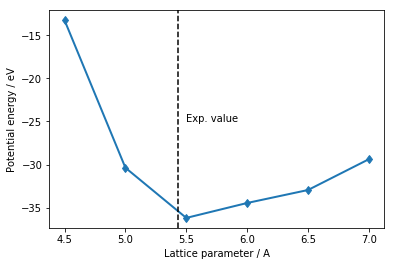

In [319]:
plt.plot(lattice_params,energies,linewidth=2,marker="d")  #Teeme graafiku kasutades liste
plt.axvline(x=5.43, color="black",linestyle='dashed')     #Lisame graafikule eksperimentaalse tulemuse
plt.annotate("Exp. value",xy=(5.5,-25))                   #Kirjutame teksti graafikule
plt.xlabel("Lattice parameter / A")                       #x-telje pealkiri
plt.ylabel("Potential energy / eV")                       #y-telje pealkiri